Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# Make Explanatory Visualizations

### Objectives

- Student can identify the appropriate visualization type for a particular variable type and research question 
- Student can use Matplotlib to visualize distributions and relationships with continuous and discrete variables
- Student can add emphasis and annotations to transform visualizations from exploratory to explanatory
- Student can remove clutter from visualizations
- Student can identify misleading visualizations and how to fix them



Import the Titanic dataset and print the first 5 rows.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the Titanic dataset from its URL:
Titanic = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Titanic/Titanic.csv')
Titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses_Aboard,Parents/Children_Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [2]:
Titanic['Fare'].describe()

count    887.00000
mean      32.30542
std       49.78204
min        0.00000
25%        7.92500
50%       14.45420
75%       31.13750
max      512.32920
Name: Fare, dtype: float64

###1) What are the appropriate visualizations to answer the question "What was the typical fare paid for passage on the Titanic?"



A boxplot would seem to be the appropriate visualization

###2) Create the visualizations you selected in 2).  

In [57]:
Titanic_Fare = Titanic[Titanic['Fare']<=300]
Titanic_Fare

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses_Aboard,Parents/Children_Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


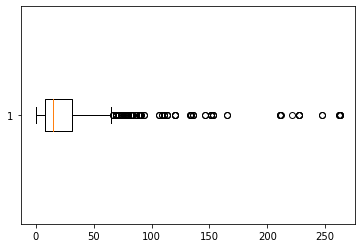

In [49]:
plt.boxplot(Titanic_Fare['Fare'],vert=False);

###3) Describe your results in a sentence or two.

The average fare paid was $32, although a lot of people have paid more for the fare

###4) Plot a histogram of fare paid by Titanic passengers by sex to see if there was a difference in fare paid between male and female passengers.  

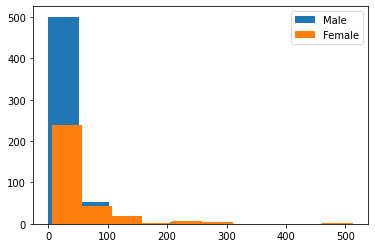

In [32]:
Titanic_Male = Titanic[Titanic['Sex']=='male']
Titanic_Female= Titanic[Titanic['Sex']=='female']
plt.hist(Titanic_Male['Fare'],label='Male')
plt.hist(Titanic_Female['Fare'],label='Female')
plt.xlabel='Price of Fare'
plt.legend(loc='upper right');

###5) Describe the difference in distribution of fare paid between male and female passengers.

###6) Make a bar plot to show the frequency of individuals in each passenger class.

col_0   counts
Pclass        
1          216
2          184
3          487


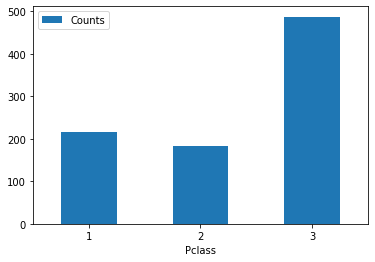

In [30]:
print(pd.crosstab(index=Titanic['Pclass'],columns='counts'))
Freq_Pclass = pd.DataFrame({'Pclass':['1','2','3'], 'Counts':[216,184,487]})
ax = Freq_Pclass.plot.bar(x='Pclass', y='Counts', rot=0)

###7) Summarize your results from 6)

It seems that most people have bought the 3rd class fare tickets and the people that bought 1st and 2nd class fare add up to less than the people that bought 3rd class 

###8) Create a graphical summary for the number of parents/ children on board for each passenger.

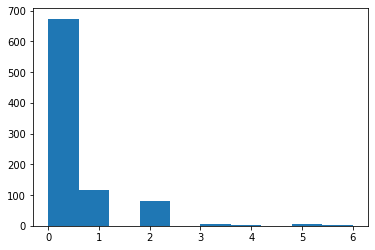

In [39]:
plt.hist(Titanic['Parents/Children_Aboard']);

###9) Summarize your results from 8).  Did most individuals travel alone or with family?

Most individuals traveled alone

###In 10) - 14)  We will use figure, axes syntax to plot passenger survival by whether the passenger was a child or an adult. 

###10) Create a variable to categorize the passenger as a child (under age 18) or adult (18 years or older).

In [89]:
Children = Titanic[Titanic['Age']<18]
Adult = Titanic[Titanic['Age']>=18]

TypeError: ignored

###11) Make a cross-tab of survival by age (child vs adult).

In [92]:
print(pd.crosstab(Titanic['Survived'],Children['Age']))
print(pd.crosstab(Titanic['Survived'],Adult['Age']))

Age       0.42   0.67   0.75   0.83   0.92   ...  14.00  14.50  15.00  16.00  17.00
Survived                                     ...                                   
0             0      0      0      0      0  ...      4      1      1     13     10
1             1      1      2      2      1  ...      3      0      4      7      6

[2 rows x 23 columns]
Age       18.0  19.0  20.0  20.5  21.0  ...  70.0  70.5  71.0  74.0  80.0
Survived                                ...                              
0           23    22    19     1    28  ...     2     1     2     1     0
1           13    11     4     0     6  ...     0     0     0     0     1

[2 rows x 66 columns]


###12) Create a new data frame to hold the data for the figure.

In [95]:
Ages_Survived = pd.concat([pd.crosstab(Titanic['Survived'],Children['Age']),pd.crosstab(Titanic['Survived'],Adult['Age'])],axis=1)
Ages_Survived

Age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,11.00,12.00,13.00,14.00,14.50,15.00,16.00,17.00,18.00,19.00,20.00,20.50,21.00,22.00,23.00,23.50,24.00,24.50,25.00,26.00,27.00,28.00,28.50,29.00,30.00,...,36.50,37.00,38.00,39.00,40.00,40.50,41.00,42.00,43.00,44.00,45.00,45.50,46.00,47.00,48.00,49.00,50.00,51.00,52.00,53.00,54.00,55.00,55.50,56.00,57.00,58.00,59.00,60.00,61.00,62.00,63.00,64.00,65.00,66.00,69.00,70.00,70.50,71.00,74.00,80.00
Survived,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,2,7,2,3,2,1,3,4,6,2,3,1,0,4,1,1,13,10,23,22,19,1,28,24,18,1,16,1,17,14,13,27,2,14,23,...,1,9,6,13,11,2,6,9,6,6,8,2,4,8,3,4,5,5,3,0,6,2,1,2,3,2,2,3,3,3,0,3,3,2,1,2,1,2,1,0
1,1,1,2,2,1,5,4,5,8,4,2,2,2,2,0,1,1,2,3,0,4,7,6,13,11,4,0,6,15,7,0,18,0,7,7,13,10,0,11,10,...,0,3,6,5,7,0,3,8,1,3,6,0,2,2,9,4,5,2,3,1,3,1,0,2,0,3,0,2,0,2,2,0,0,0,0,0,0,0,0,1


###13) Adapt the plot from the Guided Project to show the relationship between passenger age (child vs adult) and survival.

ValueError: ignored

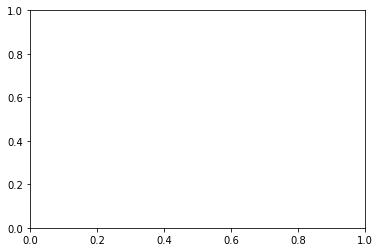

In [104]:

fix,ax=plt.subplots()
ticks=[]
ax.plot([1],Ages_Survived);

###14) Summarize your results about passenger survival by age.

Answer here

#Project Milestone

Take some time to explore the links below.  Think about how we use graphics to answer research questions and how looking at visualizations can help us develop new lines of enquiry.  

By the end of the weekend, you should have a pretty good idea (though it can change!) what kind of data and visualizations you'd like to include in your Portfolio Project.

### Links

- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)